# Import library 

In [1]:
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
from tensorflow import keras
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
import warnings
warnings.filterwarnings('ignore')
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
%%HTML
    <style type="text/css">
        table.dataframe td, table.dataframe th {
            border-style: solid;
        }

</style>

# Load data

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print(f"shape of X_train: {X_train.shape}")
print(f"shape of X_test: {X_test.shape}")
print(f"shape of y_train: {y_train.shape}")
print(f"shape of y_test: {y_test.shape}")

4423680/4422102 [==============================] - 8s 2us/step
shape of X_train: (60000, 28, 28)
shape of X_test: (10000, 28, 28)
shape of y_train: (60000,)
shape of y_test: (10000,)


# Train test split data

In [4]:
X_valid, X_train = X_train[:5000] / 255., X_train[5000:] / 255.
y_valid, y_train = y_train[:5000], y_train[5000:]
X_test = X_test / 255.

# Simple visualize

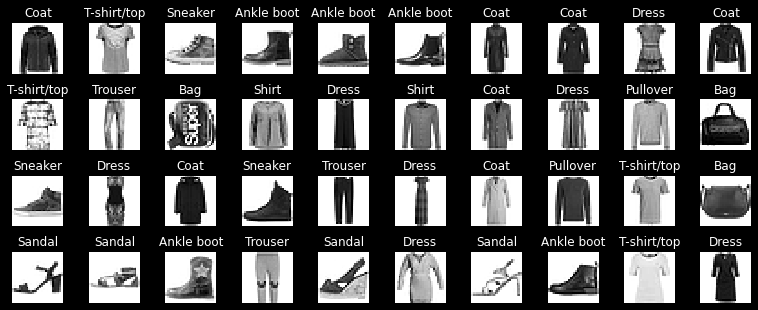

In [5]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Create model

In [6]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


# Model visualize

In [8]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


# Compiling the Image Classification Model

In [9]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

# Training and Evaluating the Image Classification Model

In [10]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 2ms/step - loss: 0.7232 - accuracy: 0.7644 - val_loss: 0.5236 - val_accuracy: 0.8270
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4917 - accuracy: 0.8292 - val_loss: 0.4417 - val_accuracy: 0.8512
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4449 - accuracy: 0.8438 - val_loss: 0.4486 - val_accuracy: 0.8396
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4170 - accuracy: 0.8519 - val_loss: 0.4033 - val_accuracy: 0.8636
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3956 - accuracy: 0.8610 - val_loss: 0.4011 - val_accuracy: 0.8570
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3800 - accuracy: 0.8657 - val_loss: 0.3964 - val_accuracy: 0.8548
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3653 - accuracy: 0.8713 - val_loss: 0.3675 - val_accuracy:

# Loss and accuarcy model

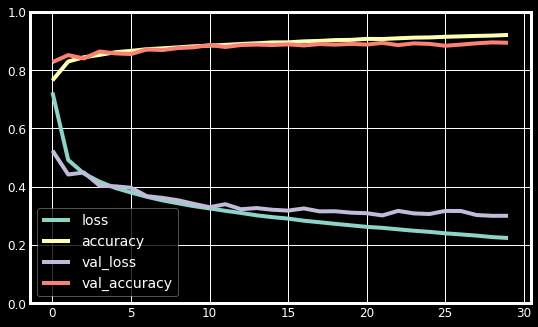

In [11]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [12]:
print(f'Loss test data: {model.evaluate(X_test, y_test)[0]}')
print(f'Accuracy test data: {model.evaluate(X_test, y_test)[1]}')

313/313 [==============================] - 0s 2ms/step - loss: 0.3370 - accuracy: 0.8806
Loss test data: 0.3370024561882019
313/313 [==============================] - 1s 2ms/step - loss: 0.3370 - accuracy: 0.8806
Accuracy test data: 0.8805999755859375


# Use the model to make predictions

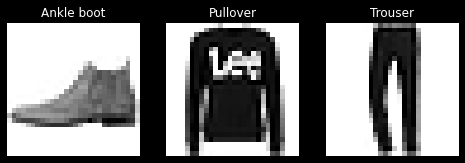

In [13]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_pred = model.predict_classes(X_new)

y_new = y_test[:3]
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()